In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MySparkApp") \
    .getOrCreate()


In [3]:
df = spark.read.csv(
    "/Users/bellebaitong/Desktop/DS-203/archive/*.csv",
    header=True,
    inferSchema=True
)

df.show(5)


25/12/12 18:20:02 WARN FileStreamSink: Assume no metadata directory. Error while looking for metadata directory in the path: /Users/bellebaitong/Desktop/DS-203/archive/*.csv.
java.io.FileNotFoundException: File /Users/bellebaitong/Desktop/DS-203/archive/*.csv does not exist
	at org.apache.hadoop.fs.RawLocalFileSystem.deprecatedGetFileStatus(RawLocalFileSystem.java:917)
	at org.apache.hadoop.fs.RawLocalFileSystem.getFileLinkStatusInternal(RawLocalFileSystem.java:1238)
	at org.apache.hadoop.fs.RawLocalFileSystem.getFileStatus(RawLocalFileSystem.java:907)
	at org.apache.hadoop.fs.FilterFileSystem.getFileStatus(FilterFileSystem.java:462)
	at org.apache.spark.sql.execution.streaming.FileStreamSink$.hasMetadata(FileStreamSink.scala:56)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:381)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.org$apache$spark$sql$catalyst$analysis$ResolveDataSource$$loadV1BatchSource(ResolveDataSource.scala:143

+----+-------+-----+------------+-----------+--------------------+------------------+------------------+-----------------+--------+-----------------+------+----------------+---------------+----+--------------+------------+--------+---------+---------+------------+--------+----------+---------+-------+------------+--------+---------+---------+------------+---------+-----------------+--------+----------------+-------------------+--------+--------+--------------+-------------+-------------+---------+--------------+-------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|             FL_DATE|MKT_UNIQUE_CARRIER|MKT_CARRIER_FL_NUM|OP_UNIQUE_CARRIER|TAIL_NUM|ORIGIN_AIRPORT_ID|ORIGIN|ORIGIN_STATE_ABR|DEST_AIRPORT_ID|DEST|DEST_STATE_ABR|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|DEP_DEL15|DEP_TIME_BLK|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|ARR_DEL15|ARR_TIME_BLK|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|DISTANCE_GROU

In [4]:
spark.sparkContext.setLogLevel("ERROR")


In [5]:
df.printSchema()


root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- MKT_UNIQUE_CARRIER: string (nullable = true)
 |-- MKT_CARRIER_FL_NUM: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- DEP_TIME_BLK: string (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 

In [6]:
print("Number of rows:", df.count())
print("Number of columns:", len(df.columns))


Number of rows: 32502560
Number of columns: 43


In [7]:
##Drop some column that is not useful

In [8]:
df = spark.read.csv(
    "/Users/bellebaitong/Desktop/DS-203/archive/*.csv",
    header=True,
    inferSchema=True
)


In [9]:
cols_to_drop = ["MKT_CARRIER_FL_NUM", "OP_UNIQUE_CARRIER", "TAIL_NUM", "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID"]
df = df.drop(*cols_to_drop)


In [10]:
## Focus only AA(Americcan Airline) And DL (Delta Airline)

In [11]:
df = df.filter(df.MKT_UNIQUE_CARRIER.isin("DL", "AA"))


In [12]:
df.select("MKT_UNIQUE_CARRIER").distinct().show()


+------------------+
|MKT_UNIQUE_CARRIER|
+------------------+
|                AA|
|                DL|
+------------------+



In [13]:
print("Number of rows:", df.count())
print("Number of columns:", len(df.columns))


Number of rows: 15006877
Number of columns: 38


In [14]:
#a. Filtering the data based on conditions. (Atleast 5 queries have to be generated. Perform filtering based on single condition and multiple conditions using and/or keywords)

In [15]:
#1.Flights where the departure delay exceeded 30 minutes.

In [16]:
dep_delay_count = df.filter(df.DEP_DELAY > 30).count()
total_flights = df.count()
dep_delay_percentage = (dep_delay_count / total_flights) * 100

print("Total Flights:", total_flights)
print("Flights with Departure Delay > 30 minutes:", dep_delay_count)
print("Percentage:", round(dep_delay_percentage, 2), "%")


Total Flights: 15006877
Flights with Departure Delay > 30 minutes: 1529331
Percentage: 10.19 %


In [17]:
#2.Cancelled Flight

In [18]:
cancelled_count = df.filter(df.CANCELLED == 1).count()
total_count = df.count()
cancelled_percentage = (cancelled_count / total_count) * 100

print("Total Flights:", total_count)
print("Cancelled Flights:", cancelled_count)
print("Percentage Cancelled:", round(cancelled_percentage, 2), "%")


Total Flights: 15006877
Cancelled Flights: 330196
Percentage Cancelled: 2.2 %


In [19]:
#3.Flights operated by AA AND distance > 1000 miles

In [20]:
df.filter((df.MKT_UNIQUE_CARRIER== "AA") & (df.DISTANCE > 1000)).count()


1885980

In [21]:
#4.Count flights delayed more than 60 minutes (Arrival OR Departure)

In [22]:
delayed_60_count = df.filter(
    (df.ARR_DELAY > 60) | 
    (df.DEP_DELAY > 60)
).count()
total_flights = df.count()
delayed_60_percentage = (delayed_60_count / total_flights) * 100

print("Total Flights:", total_flights)
print("Flights delayed > 60 minutes (ARR or DEP):", delayed_60_count)
print("Percentage:", round(delayed_60_percentage, 2), "%")


Total Flights: 15006877
Flights delayed > 60 minutes (ARR or DEP): 968754
Percentage: 6.46 %


In [23]:
#5.Count Flights with weather delay

In [24]:
df.filter(df.WEATHER_DELAY > 0).count()


211963

In [25]:
#b. Create a new column based on the existing columns. - At least one column has to be created.

In [26]:
#Create a “TOTAL_DELAY” column

In [27]:
from pyspark.sql.functions import col

df = df.withColumn("TOTAL_DELAY", col("DEP_DELAY") + col("ARR_DELAY"))
df.select("DEP_DELAY", "ARR_DELAY", "TOTAL_DELAY").show(5)


+---------+---------+-----------+
|DEP_DELAY|ARR_DELAY|TOTAL_DELAY|
+---------+---------+-----------+
|      0.0|     11.0|       11.0|
|     -4.0|     11.0|        7.0|
|     -5.0|    -14.0|      -19.0|
|     -7.0|    -11.0|      -18.0|
|     -4.0|     -5.0|       -9.0|
+---------+---------+-----------+
only showing top 5 rows


In [28]:
#c. Aggregate functions (sum, avg, min, max) - At least 2 queries have to be performed.

In [29]:
#Average Arrival Delay (avg)

In [30]:
from pyspark.sql.functions import avg

df.select(avg("ARR_DELAY").alias("average_arrival_delay")).show()


+---------------------+
|average_arrival_delay|
+---------------------+
|   3.5828896901893086|
+---------------------+



In [31]:
#Maximum Departure Delay (max)

In [32]:
from pyspark.sql.functions import max

df.select(max("DEP_DELAY").alias("max_departure_delay")).show()


+-------------------+
|max_departure_delay|
+-------------------+
|             7223.0|
+-------------------+



In [33]:
#d. Grouping the records based on a single or multiple columns. - At least 1 query has to be performed.

In [34]:
#Average departure Delay by Airline

In [35]:
from pyspark.sql.functions import avg

result = df.groupBy("MKT_UNIQUE_CARRIER") \
           .agg(avg("DEP_DELAY").alias("avg_departure_delay")) \
           .orderBy("avg_departure_delay", ascending=False)

result.show()


+------------------+-------------------+
|MKT_UNIQUE_CARRIER|avg_departure_delay|
+------------------+-------------------+
|                AA| 11.076231181756944|
|                DL|  7.645937622389458|
+------------------+-------------------+



In [36]:
#e. Sorting the records - At least 1 query has to be performed.

In [37]:
#Sort flights by arrival delay (descending)
df.orderBy(df.ARR_DELAY.desc()).show(5)


+----+-------+-----+------------+-----------+--------------------+------------------+------+----------------+----+--------------+------------+--------+---------+---------+------------+--------+----------+---------+-------+------------+--------+---------+---------+------------+---------+-----------------+--------+----------------+-------------------+--------+--------+--------------+-------------+-------------+---------+--------------+-------------------+-----------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|             FL_DATE|MKT_UNIQUE_CARRIER|ORIGIN|ORIGIN_STATE_ABR|DEST|DEST_STATE_ABR|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|DEP_DEL15|DEP_TIME_BLK|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|ARR_DEL15|ARR_TIME_BLK|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|DISTANCE_GROUP|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|TOTAL_DELAY|
+----+-------+-----+------------+-----------+---------------

In [38]:
#f. Join (Full, Left, Right, Self) - At least 1 join has to be performed.

In [39]:
#percentage of delayed flights (>30 min) by airline.

In [40]:
from pyspark.sql.functions import col

total = df.groupBy("MKT_UNIQUE_CARRIER") \
          .count() \
          .withColumnRenamed("count", "total_flights")

delayed = df.filter(df.DEP_DELAY > 30) \
            .groupBy("MKT_UNIQUE_CARRIER") \
            .count() \
            .withColumnRenamed("count", "delayed_flights")

result = total.join(delayed, on="MKT_UNIQUE_CARRIER", how="left")


In [41]:
#Add percentage column

from pyspark.sql.functions import (col, round)

result = result.withColumn(
    "delay_percentage",
    round((col("delayed_flights") / col("total_flights")) * 100, 2)
)


In [42]:
result.orderBy("delay_percentage", ascending=False).show()


+------------------+-------------+---------------+----------------+
|MKT_UNIQUE_CARRIER|total_flights|delayed_flights|delay_percentage|
+------------------+-------------+---------------+----------------+
|                AA|      8250619|         948019|           11.49|
|                DL|      6756258|         581312|             8.6|
+------------------+-------------+---------------+----------------+



In [43]:
#g. Window functions (rank(), dense_rank(), lag(), lead()) - At least 2 queries have to be performed.

In [44]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, dense_rank, lag, lead, col


In [45]:
#Rank airlines by average arrival delay

In [46]:
from pyspark.sql.functions import avg

window = Window.orderBy(col("avg_arr_delay").desc())

ranked_delays = df.groupBy("MKT_UNIQUE_CARRIER") \
    .agg(avg("ARR_DELAY").alias("avg_arr_delay")) \
    .withColumn("rank", rank().over(window))

ranked_delays.show()


+------------------+------------------+----+
|MKT_UNIQUE_CARRIER|     avg_arr_delay|rank|
+------------------+------------------+----+
|                AA| 6.023291658355746|   1|
|                DL|0.6303460022644041|   2|
+------------------+------------------+----+



In [47]:
#Compare current arrival delay with previous flight (same airline)

In [48]:
window = Window.partitionBy("MKT_UNIQUE_CARRIER") \
               .orderBy("FL_DATE")

df_lag = df.withColumn("prev_arr_delay", lag("ARR_DELAY").over(window))

df_lag.select(
    "MKT_UNIQUE_CARRIER", "FL_DATE", "ARR_DELAY", "prev_arr_delay"
).show(20)


+------------------+--------------------+---------+--------------+
|MKT_UNIQUE_CARRIER|             FL_DATE|ARR_DELAY|prev_arr_delay|
+------------------+--------------------+---------+--------------+
|                AA|1/1/2020 12:00:00 AM|     11.0|          NULL|
|                AA|1/1/2020 12:00:00 AM|     11.0|          11.0|
|                AA|1/1/2020 12:00:00 AM|    -14.0|          11.0|
|                AA|1/1/2020 12:00:00 AM|    -11.0|         -14.0|
|                AA|1/1/2020 12:00:00 AM|     -5.0|         -11.0|
|                AA|1/1/2020 12:00:00 AM|    -14.0|          -5.0|
|                AA|1/1/2020 12:00:00 AM|     69.0|         -14.0|
|                AA|1/1/2020 12:00:00 AM|     66.0|          69.0|
|                AA|1/1/2020 12:00:00 AM|    -14.0|          66.0|
|                AA|1/1/2020 12:00:00 AM|    -10.0|         -14.0|
|                AA|1/1/2020 12:00:00 AM|     42.0|         -10.0|
|                AA|1/1/2020 12:00:00 AM|    -18.0|          4

In [49]:
#h. Aggregate window functions - At least 2 queries have to be performed.

In [50]:
#Average arrival delay by airline

In [51]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg

w_airline = Window.partitionBy("MKT_UNIQUE_CARRIER")

df_avg_airline = df.withColumn(
    "avg_arr_delay_by_airline",
    avg("ARR_DELAY").over(w_airline)
)

df_avg_airline.select(
    "MKT_UNIQUE_CARRIER", "ARR_DELAY", "avg_arr_delay_by_airline"
).show(10)


+------------------+---------+------------------------+
|MKT_UNIQUE_CARRIER|ARR_DELAY|avg_arr_delay_by_airline|
+------------------+---------+------------------------+
|                AA|     11.0|       6.023291658355746|
|                AA|    -20.0|       6.023291658355746|
|                AA|     11.0|       6.023291658355746|
|                AA|     32.0|       6.023291658355746|
|                AA|    -14.0|       6.023291658355746|
|                AA|     19.0|       6.023291658355746|
|                AA|    -11.0|       6.023291658355746|
|                AA|    -13.0|       6.023291658355746|
|                AA|     -5.0|       6.023291658355746|
|                AA|    -14.0|       6.023291658355746|
+------------------+---------+------------------------+
only showing top 10 rows


In [52]:
#Total flights per origin airport

In [53]:
from pyspark.sql.window import Window
from pyspark.sql.functions import count

w_origin = Window.partitionBy("ORIGIN")

df_origin_counts = df.withColumn(
    "total_flights_from_origin",
    count("*").over(w_origin)
)

df_origin_counts.select(
    "ORIGIN", "total_flights_from_origin"
).distinct().show(10)


+------+-------------------------+
|ORIGIN|total_flights_from_origin|
+------+-------------------------+
|   BGM|                     2163|
|   BTM|                     3119|
|   BUR|                    14285|
|   CAK|                     9329|
|   CHO|                    21792|
|   CID|                    23976|
|   CIU|                     3528|
|   CMH|                    91217|
|   COD|                      269|
|   CRW|                    12439|
+------+-------------------------+
only showing top 10 rows


In [54]:
#Which Airline & Which Quarter Has More Departure Delay Each Year?

In [55]:
from pyspark.sql.functions import avg

delay_by_quarter = df.groupBy(
    "YEAR", "QUARTER", "MKT_UNIQUE_CARRIER"
).agg(
    avg("DEP_DELAY").alias("avg_dep_delay")
).orderBy("YEAR", "QUARTER", "avg_dep_delay", ascending=True)

delay_by_quarter.show()


+----+-------+------------------+--------------------+
|YEAR|QUARTER|MKT_UNIQUE_CARRIER|       avg_dep_delay|
+----+-------+------------------+--------------------+
|2020|      1|                DL|   4.931439628867002|
|2020|      1|                AA|   6.508622462225453|
|2020|      2|                AA| -2.0623568555508713|
|2020|      2|                DL| -1.4473176561367849|
|2020|      3|                DL|0.016856540084388187|
|2020|      3|                AA|  0.7346472140478855|
|2020|      4|                DL|   0.597796893147503|
|2020|      4|                AA|   2.149164942749504|
|2021|      1|                DL|  2.1109949406157913|
|2021|      1|                AA|   4.503448042385362|
|2021|      2|                DL|   4.780806032423109|
|2021|      2|                AA|   9.886201070791195|
|2021|      3|                DL|   7.464939995895309|
|2021|      3|                AA|  12.939370522348593|
|2021|      4|                DL|   7.367935445006374|
|2021|    

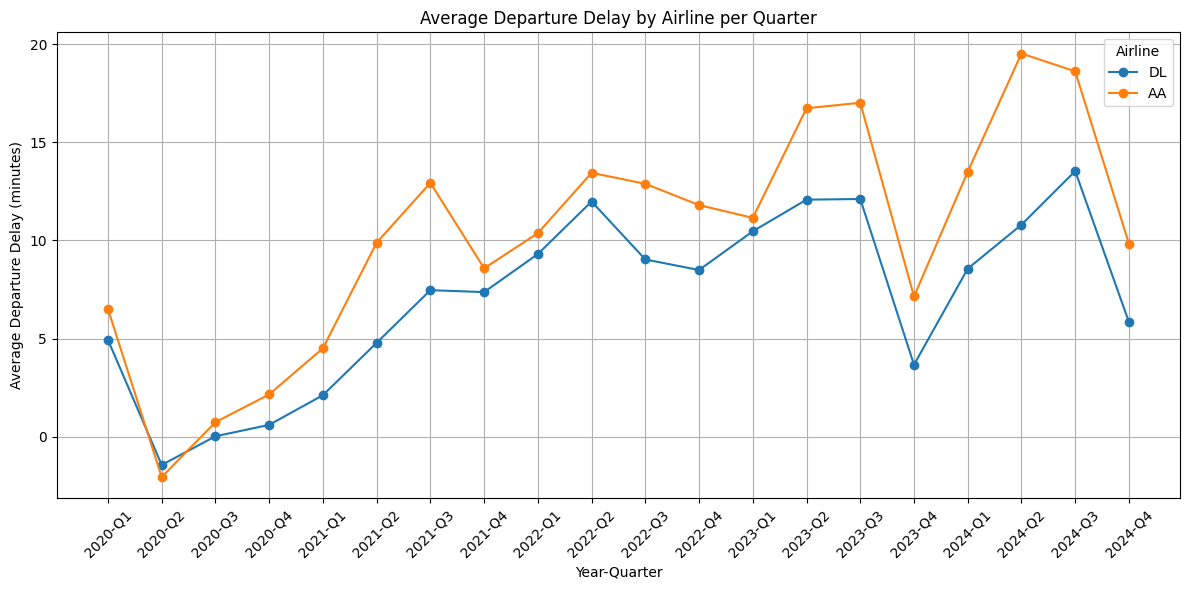

In [56]:
pandas_df = delay_by_quarter.toPandas()

pandas_df["YEAR_QUARTER"] = pandas_df["YEAR"].astype(str) + "-Q" + pandas_df["QUARTER"].astype(str)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for airline in pandas_df["MKT_UNIQUE_CARRIER"].unique():
    subset = pandas_df[pandas_df["MKT_UNIQUE_CARRIER"] == airline]
    plt.plot(subset["YEAR_QUARTER"], subset["avg_dep_delay"], marker="o", label=airline)

plt.xticks(rotation=45)
plt.xlabel("Year-Quarter")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Airline per Quarter")
plt.legend(title="Airline")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
#delayed flights (>60 min) per airline

In [58]:
delayed_60 = df.filter(df.DEP_DELAY > 60) \
               .groupBy("MKT_UNIQUE_CARRIER") \
               .count() \
               .withColumnRenamed("count", "delayed_over_60")

delayed_60.show()


+------------------+---------------+
|MKT_UNIQUE_CARRIER|delayed_over_60|
+------------------+---------------+
|                AA|         543732|
|                DL|         322115|
+------------------+---------------+



In [59]:

total = df.groupBy("MKT_UNIQUE_CARRIER") \
          .count() \
          .withColumnRenamed("count", "total_flights")

result = total.join(delayed_60, on="MKT_UNIQUE_CARRIER", how="left")

result = result.withColumn(
    "percentage_delayed_over_60",
    round((col("delayed_over_60") / col("total_flights")) * 100, 2)
)

result.show()


+------------------+-------------+---------------+--------------------------+
|MKT_UNIQUE_CARRIER|total_flights|delayed_over_60|percentage_delayed_over_60|
+------------------+-------------+---------------+--------------------------+
|                AA|      8250619|         543732|                      6.59|
|                DL|      6756258|         322115|                      4.77|
+------------------+-------------+---------------+--------------------------+



In [60]:
#flight delay in each airline is <0, 0, 1-30 mins, 31-60 mins, 61-90 mins, 91-120 mins, >120 mins

In [61]:
from pyspark.sql.functions import when

df_bucket = df.withColumn(
    "delay_bucket",
    when(df.DEP_DELAY < 0, "<0")
    .when(df.DEP_DELAY == 0, "0")
    .when((df.DEP_DELAY >= 1) & (df.DEP_DELAY <= 30), "1-30")
    .when((df.DEP_DELAY >= 31) & (df.DEP_DELAY <= 60), "31-60")
    .when((df.DEP_DELAY >= 61) & (df.DEP_DELAY <= 90), "61-90")
    .when((df.DEP_DELAY >= 91) & (df.DEP_DELAY <= 120), "91-120")
    .otherwise(">120")
)


In [62]:
delay_stats = df_bucket.groupBy("MKT_UNIQUE_CARRIER", "delay_bucket") \
                       .count() \
                       .orderBy("MKT_UNIQUE_CARRIER", "delay_bucket")


In [63]:
delay_stats.show(100)


+------------------+------------+-------+
|MKT_UNIQUE_CARRIER|delay_bucket|  count|
+------------------+------------+-------+
|                AA|           0| 274197|
|                AA|        1-30|1479038|
|                AA|       31-60| 404287|
|                AA|       61-90| 201554|
|                AA|      91-120| 114929|
|                AA|          <0|5341872|
|                AA|        >120| 434742|
|                DL|           0| 344552|
|                DL|        1-30|1186924|
|                DL|       31-60| 259197|
|                DL|       61-90| 118053|
|                DL|      91-120|  67470|
|                DL|          <0|4528409|
|                DL|        >120| 251653|
+------------------+------------+-------+



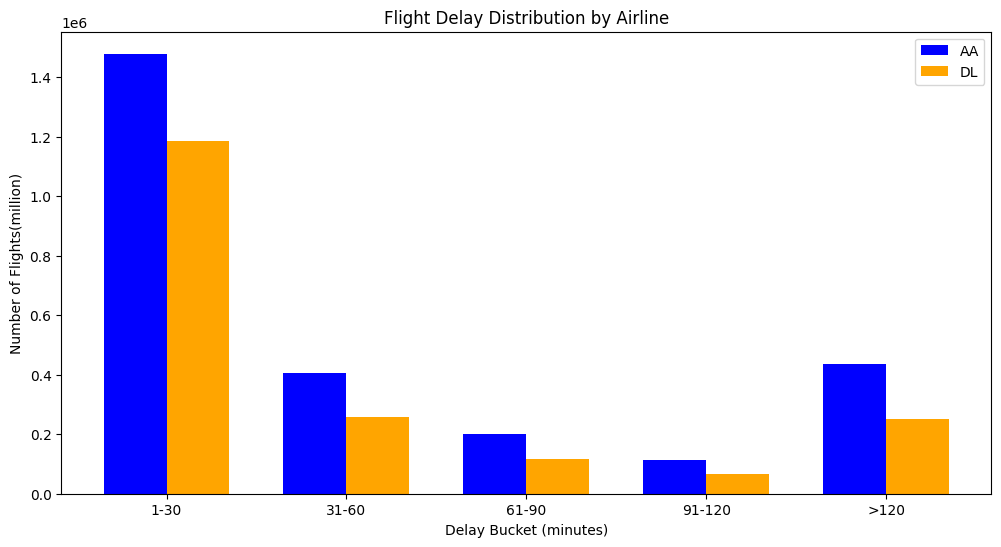

In [64]:
import matplotlib.pyplot as plt
import numpy as np

airlines = ["AA", "DL"]
buckets = ["1-30", "31-60", "61-90", "91-120", ">120"]

AA_values = [1479038, 404287, 201554, 114929, 434742]  
DL_values = [1186924, 259197, 118053, 67470, 251653]

x = np.arange(len(buckets))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, AA_values, width, label="AA", color="blue")
plt.bar(x + width/2, DL_values, width, label="DL", color="orange")

plt.xlabel("Delay Bucket (minutes)")
plt.ylabel("Number of Flights(million)")
plt.title("Flight Delay Distribution by Airline")
plt.xticks(x, buckets)
plt.legend()
plt.show()


In [65]:
#correlation between DISTANCE and DEP_DELAY

In [66]:
df.stat.corr("DISTANCE", "DEP_DELAY")


0.02354029741874924

In [67]:
#correlation is positive → Longer flights tend to be delayed more.
#Possibly due to complex routing or airport congestion on long routes.

In [70]:
from pyspark.sql.functions import when, col, count

# Create distance groups again
df_distance = df.withColumn(
    "distance_group",
    when(df.DISTANCE < 500, "<500 miles")
    .when((df.DISTANCE >= 500) & (df.DISTANCE < 1000), "500-999 miles")
    .when((df.DISTANCE >= 1000) & (df.DISTANCE < 1500), "1000-1499 miles")
    .when((df.DISTANCE >= 1500) & (df.DISTANCE < 2500), "1500-2499 miles")
    .otherwise("2500+ miles")
)

# Count flights delayed >30 mins for each airline & distance group
delayed = df_distance.filter(df_distance.DEP_DELAY > 30) \
                     .groupBy("MKT_UNIQUE_CARRIER", "distance_group") \
                     .count() \
                     .withColumnRenamed("count", "delayed_count")

# Count total flights for each airline & distance group
total = df_distance.groupBy("MKT_UNIQUE_CARRIER", "distance_group") \
                   .count() \
                   .withColumnRenamed("count", "total_count")

# Join and calculate percentage
result = delayed.join(total, ["MKT_UNIQUE_CARRIER", "distance_group"]) \
                .withColumn("delay_percentage",
                            (col("delayed_count") / col("total_count")) * 100)

result.orderBy("MKT_UNIQUE_CARRIER", "distance_group").show(50)


+------------------+---------------+-------------+-----------+------------------+
|MKT_UNIQUE_CARRIER| distance_group|delayed_count|total_count|  delay_percentage|
+------------------+---------------+-------------+-----------+------------------+
|                AA|1000-1499 miles|       158769|    1221891| 12.99371220509849|
|                AA|1500-2499 miles|        66969|     572290|11.701934333991508|
|                AA|    2500+ miles|         8919|      91799| 9.715792111025175|
|                AA|  500-999 miles|       350045|    2920341|11.986442679125487|
|                AA|     <500 miles|       363317|    3444298|10.548361378719264|
|                DL|1000-1499 miles|        77393|     794085| 9.746185861715055|
|                DL|1500-2499 miles|        63151|     704191| 8.967879453159725|
|                DL|    2500+ miles|         9414|      92963|10.126609511310953|
|                DL|  500-999 miles|       208105|    2396799| 8.682622113911096|
|               

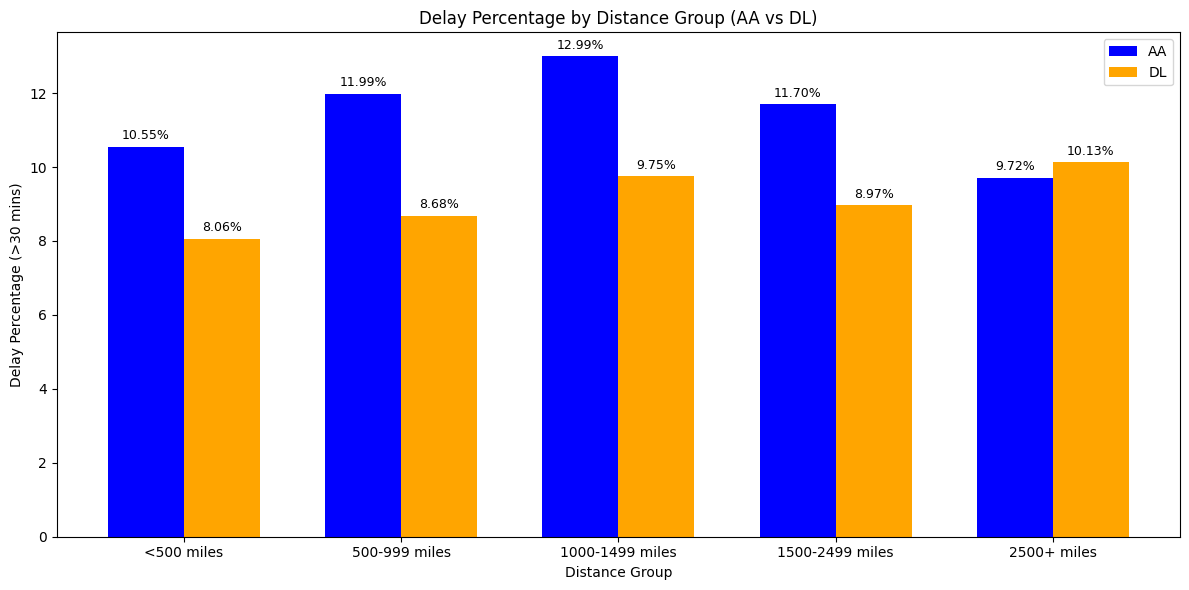

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Distance groups in correct order
distance_groups = ["<500 miles", "500-999 miles", "1000-1499 miles", "1500-2499 miles", "2500+ miles"]

# Your real delay percentages
AA = [10.548361378719264, 11.986442679125487, 12.99371220509849, 11.701934333991508, 9.715792111025175]
DL = [8.064713064713064, 8.682622113911096, 9.746185861715055, 8.967879453159725, 10.126609511310953]

x = np.arange(len(distance_groups))
width = 0.35

plt.figure(figsize=(12,6))

# Plotting AA and DL
bar1 = plt.bar(x - width/2, AA, width, label="AA", color="blue")
bar2 = plt.bar(x + width/2, DL, width, label="DL", color="orange")

# Adding value labels on top
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.2f}%", ha='center', fontsize=9)

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.2f}%", ha='center', fontsize=9)

# Labels
plt.xlabel("Distance Group")
plt.ylabel("Delay Percentage (>30 mins)")
plt.title("Delay Percentage by Distance Group (AA vs DL)")
plt.xticks(x, distance_groups)
plt.legend()

plt.tight_layout()
plt.show()
